# Lineage coupling analysis

Compare lineage relationship between cell types and compare between perturbations

In [1]:
import cospar as cs
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import scvi
import matplotlib
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

In [2]:
#sc.settings.set_figure_params(dpi=100, facecolor='white')
cs.settings.set_figure_params()
cs.settings.data_path = "/wynton/scratch/jding/Cellranger-7.2.0"
cs.settings.figure_path = "./figures/cospar"
cs.hf.set_up_folders()

/wynton/home/pollenlab/jding/miniconda3/envs/cospar/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/cospar/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/cospar/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/cospar/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


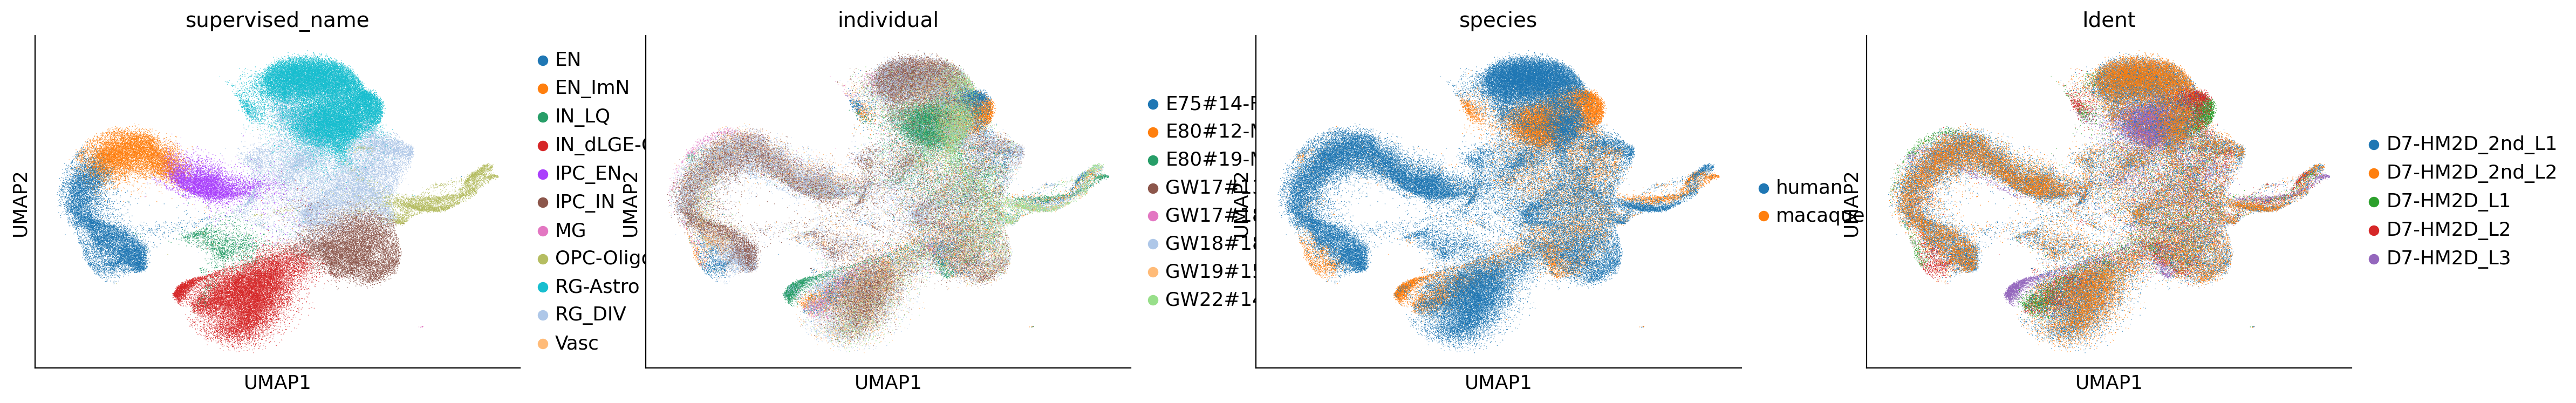

In [34]:
directory='/wynton/group/pollen/jding/brainchromatin/HM2D/'
adata = sc.read(os.path.join(directory,'HM2D-filtered_guides.h5ad'), compression='gzip')
sc.pl.umap(adata, color=['supervised_name','individual','species','Ident'])
adata.uns["data_des"] = "/wynton/scratch/jding/Cellranger-7.2.0"

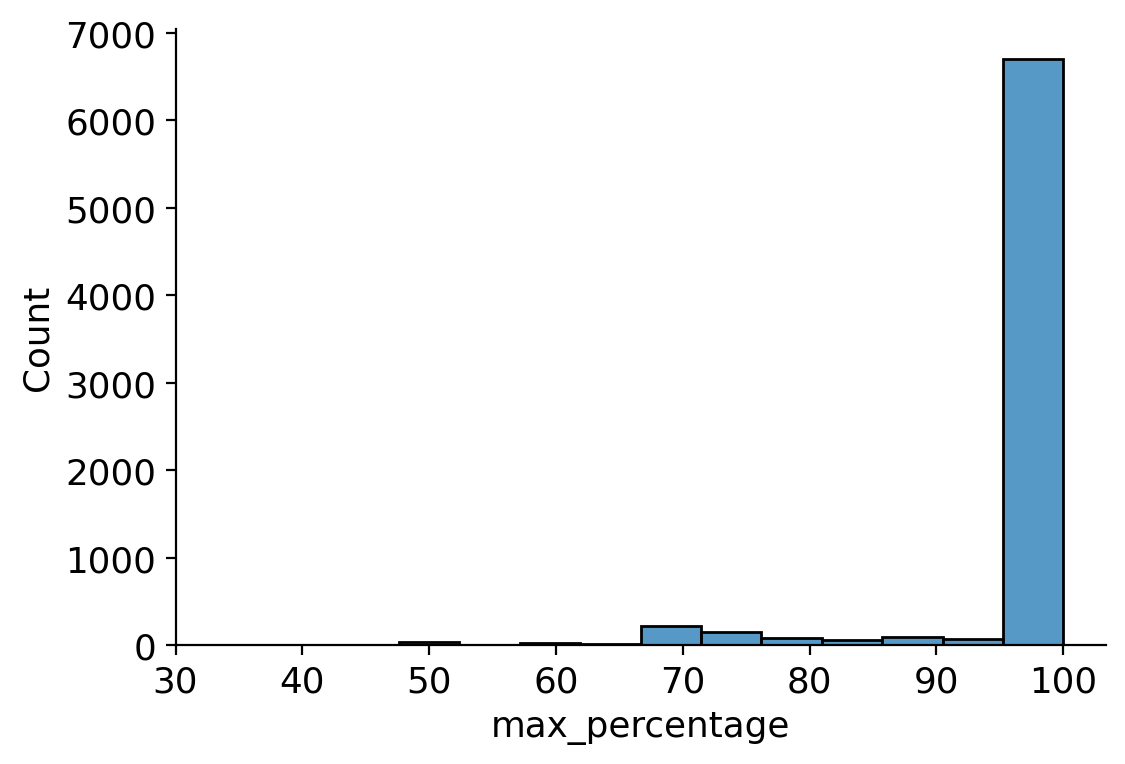

In [6]:
#remove clones w conflicted sgRNA assignments
df = adata.obs.groupby(["unique_clone","gene_NKS"]).size().reset_index(name="count")
df = df[df['count'] != 0]
df['total_count'] = df.groupby('unique_clone')['count'].transform('sum')
df['percentage'] = (df['count'] / df['total_count']) * 100
df['max_percentage'] = df.groupby('unique_clone')['percentage'].transform('max')
df = df.sort_values(by='max_percentage', ascending=False)
df = df.drop_duplicates(subset='unique_clone', keep="first")
import seaborn as sns
sns.histplot(data=df[df['total_count'] > 2], x="max_percentage")
adata = adata[adata.obs['unique_clone'].isin(df[df['max_percentage'] == 100]['unique_clone'])]

In [35]:
adata = adata[adata.obs["clone_barcode_criteria"] != 'no_clones_found']
adata.obs["unique_clone"] = adata.obs["clone_barcode"].astype(str) + adata.obs["individual"].astype(str)
adata.obs["time_info"] = '0'
adata.obs["time_info"].value_counts()

/scratch/jding/ipykernel_3269594/3640936254.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["unique_clone"] = adata.obs["clone_barcode"].astype(str) + adata.obs["individual"].astype(str)


time_info
0    106698
Name: count, dtype: int64

In [40]:
#subset clones with >2 cells
df = adata.obs['unique_clone'].value_counts().reset_index(name='cellcounts')
multiclones = df[df['cellcounts'] > 2 ]['unique_clone'].values

In [41]:
len(multiclones)

6689

/scratch/jding/ipykernel_533242/3506099337.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sub.obs['supervised_name'] = ['IN' if x == 'IN_dLGE-CGE' else x for x in sub.obs['supervised_name']]
100%|████████████████████████████████| 26056/26056 [00:00<00:00, 1151660.10it/s]


reorder clones
normalize by X_clone
each selected cluster has a unique time point. Normalize per time point
Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<Axes: title={'center': 'source: X_clone'}>

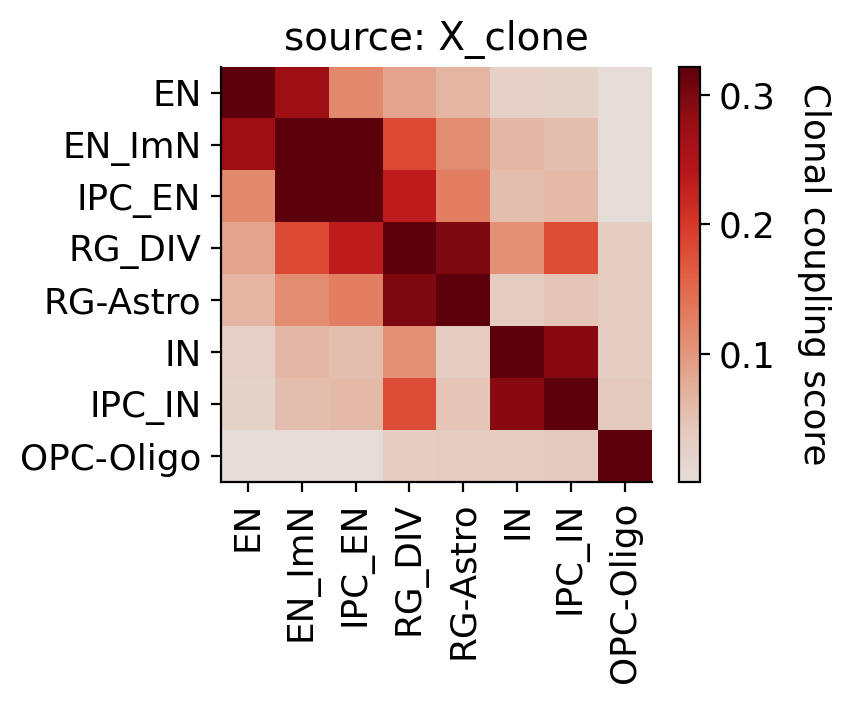

In [36]:
selected_fates = [ 'RG_DIV', 'RG-Astro', 'EN', 'IPC_IN', 'OPC-Oligo', 'IN', 'EN_ImN', 'IPC_EN']
sub = adata[adata.obs['species'] == 'human']
#sub = sub[sub.obs['gene_NKS'] == 'non-targeting']
df = sub.obs['unique_clone'].value_counts().reset_index(name='cellcounts')
multiclones = df[df['cellcounts'] > 2]['unique_clone'].values
sub = sub[sub.obs['unique_clone'].isin(multiclones)]
#rename IN 
sub.obs['supervised_name'] = ['IN' if x == 'IN_dLGE-CGE' else x for x in sub.obs['supervised_name']]
cs.pp.get_X_clone(sub,sub.obs.index.tolist(),sub.obs.unique_clone.tolist())
sub.obs["state_info"] = sub.obs['supervised_name'].astype(str)
cs.tl.fate_coupling(sub,source='X_clone',selected_fates=selected_fates) # compute the fate coupling
cs.pl.fate_coupling(sub,source='X_clone') # actually plot the coupling

/scratch/jding/ipykernel_533242/3131695352.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sub.obs['supervised_name'] = ['IN' if x == 'IN_dLGE-CGE' else x for x in sub.obs['supervised_name']]
100%|██████████████████████████████████| 3392/3392 [00:00<00:00, 1187965.86it/s]


reorder clones
normalize by X_clone
each selected cluster has a unique time point. Normalize per time point
Results saved as dictionary at adata.uns['fate_coupling_X_clone']


/scratch/jding/ipykernel_533242/3131695352.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sub.obs['supervised_name'] = ['IN' if x == 'IN_dLGE-CGE' else x for x in sub.obs['supervised_name']]
100%|██████████████████████████████████| 8630/8630 [00:00<00:00, 1130233.05it/s]


reorder clones
normalize by X_clone
each selected cluster has a unique time point. Normalize per time point
Results saved as dictionary at adata.uns['fate_coupling_X_clone']


/scratch/jding/ipykernel_533242/3131695352.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sub.obs['supervised_name'] = ['IN' if x == 'IN_dLGE-CGE' else x for x in sub.obs['supervised_name']]
100%|██████████████████████████████████| 4470/4470 [00:00<00:00, 1234512.34it/s]


reorder clones
normalize by X_clone
each selected cluster has a unique time point. Normalize per time point
Results saved as dictionary at adata.uns['fate_coupling_X_clone']


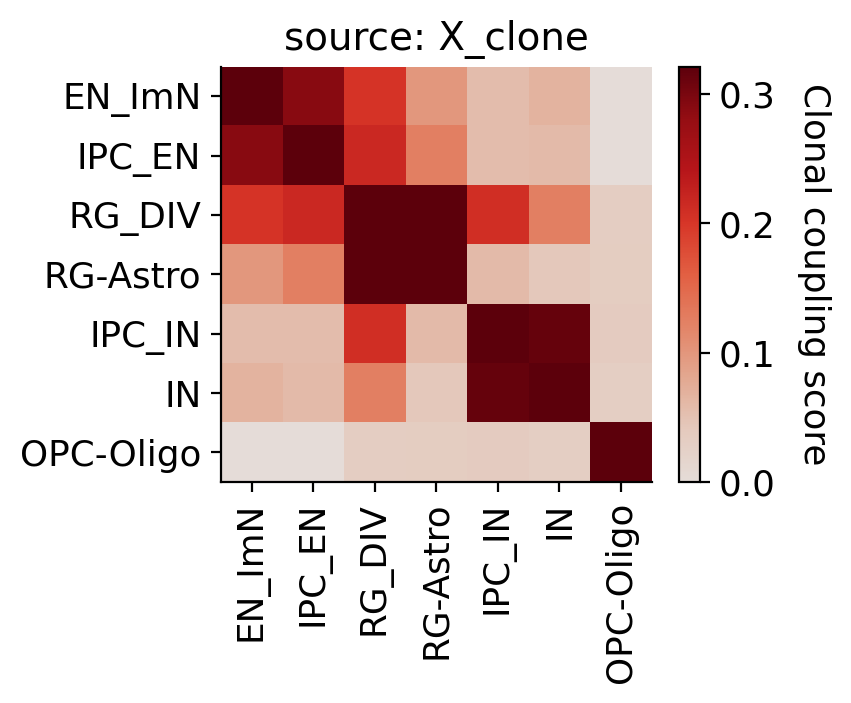

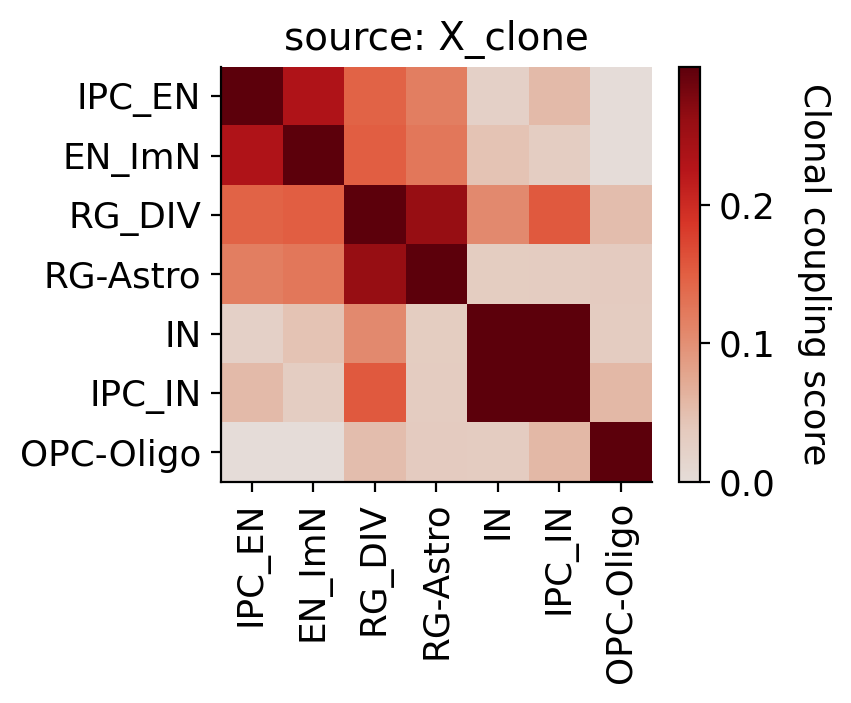

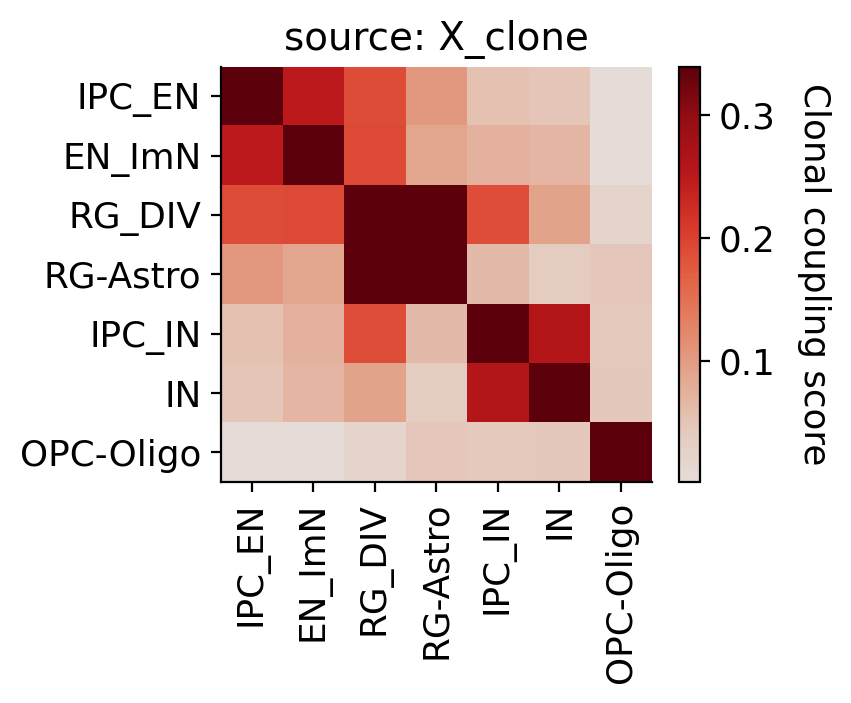

In [43]:
selected_fates = [ 'RG_DIV', 'RG-Astro', 'IPC_IN', 'IN', 'EN_ImN', 'IPC_EN','OPC-Oligo']
for target in ['non-targeting','ARX','SOX2']:
    sub = adata[adata.obs['species'] == 'human']
    sub = sub[sub.obs['unique_clone'].isin(multiclones)]
    sub = sub[sub.obs['gene_NKS'] == target]
    #rename IN 
    sub.obs['supervised_name'] = ['IN' if x == 'IN_dLGE-CGE' else x for x in sub.obs['supervised_name']]
    cs.pp.get_X_clone(sub,sub.obs.index.tolist(),sub.obs.unique_clone.tolist())
    sub.obs["state_info"] = sub.obs['supervised_name'].astype(str)
    #cs.pl.barcode_heatmap(sub,selected_times=None,selected_fates=selected_fates,
    #    color_bar=True,log_transform=False,binarize=True)
    cs.tl.fate_coupling(sub,source='X_clone',selected_fates=selected_fates) # compute the fate coupling
    cs.pl.fate_coupling(sub,source='X_clone') # actually plot the coupling